In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets, svm
from sklearn import preprocessing

In [2]:
X, y = datasets.make_moons(n_samples=100, noise=0.1, random_state=40)
X = X[y.argsort()]
y = y[y.argsort()]

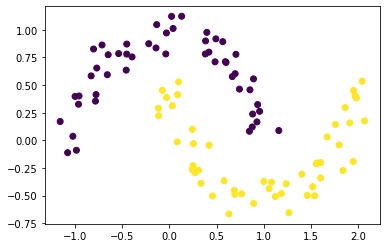

In [3]:
plt.scatter(*X.T, c=y);

In [4]:
xx, yy = np.meshgrid(np.linspace(-2, 2.5, 100), np.linspace(-2, 2, 100))

In [5]:
model = svm.SVC(kernel = 'rbf', C=0.1, gamma=1)

In [6]:
model.fit(preprocessing.scale(X*[1000, 1]),y)

SVC(C=0.1, gamma=1)

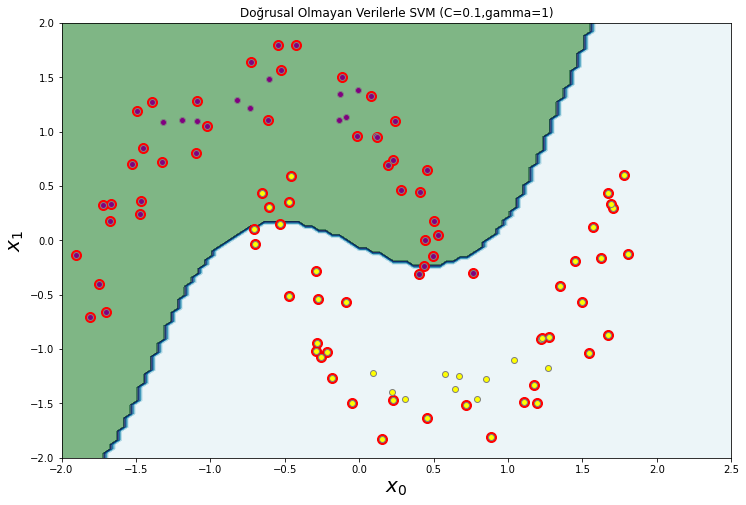

In [7]:
plt.figure(figsize=(12,8))
plt.contourf(xx, yy, model.predict(np.array([xx.ravel(), yy.ravel()]).T).reshape(xx.shape), 
             alpha=0.5, levels=10, cmap=plt.cm.ocean)
plt.scatter(*model.support_vectors_.T, s=100, linewidth=1, facecolors='red')
plt.scatter(*(preprocessing.scale(X*[1000, 1]))[y==0].T, edgecolors='grey', color='purple', label='-')
plt.scatter(*(preprocessing.scale(X*[1000, 1]))[y==1].T, edgecolors='grey', color='yellow', label='+')
plt.title('Doğrusal Olmayan Verilerle SVM (C=0.1,gamma=1)')
plt.xlabel('$x_0$', fontsize=20)
plt.ylabel('$x_1$', fontsize=20);

In [8]:
model1 = svm.SVC(kernel = 'rbf', C=1, gamma=1)

In [9]:
model1.fit(preprocessing.scale(X*[1000, 1]),y)

SVC(C=1, gamma=1)

In [10]:
model2 = svm.SVC(kernel = 'rbf', C=10, gamma=1)

In [11]:
model2.fit(preprocessing.scale(X*[1000, 1]),y)

SVC(C=10, gamma=1)

In [12]:
model3 = svm.SVC(kernel = 'rbf', C=0.1, gamma=10)

In [13]:
model3.fit(preprocessing.scale(X*[1000, 1]),y)

SVC(C=0.1, gamma=10)

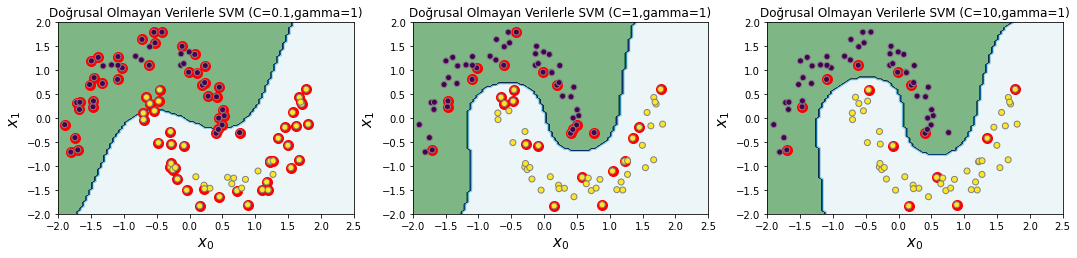

In [14]:
plt.figure(figsize=(18,12))
plt.subplot(3,3,1)
plt.contourf(xx, yy, model.predict(np.array([xx.ravel(), yy.ravel()]).T).reshape(xx.shape), 
             alpha=0.5, levels=10, cmap=plt.cm.ocean)
plt.scatter(*model.support_vectors_.T, s=100, linewidth=1, facecolors='red')
plt.scatter(*(preprocessing.scale(X*[1000, 1])).T, c=y, edgecolors='grey')
plt.title('Doğrusal Olmayan Verilerle SVM (C=0.1,gamma=1)')
plt.xlabel('$x_0$', fontsize=15)
plt.ylabel('$x_1$', fontsize=15)

plt.subplot(3,3,2)
plt.contourf(xx, yy, model1.predict(np.array([xx.ravel(), yy.ravel()]).T).reshape(xx.shape), 
             alpha=0.5, levels=10, cmap=plt.cm.ocean)
plt.scatter(*model1.support_vectors_.T, s=100, linewidth=1, facecolors='red')
plt.scatter(*(preprocessing.scale(X*[1000, 1])).T, c=y, edgecolors='grey')
plt.title('Doğrusal Olmayan Verilerle SVM (C=1,gamma=1)')
plt.xlabel('$x_0$', fontsize=15)
plt.ylabel('$x_1$', fontsize=15)

plt.subplot(3,3,3)
plt.contourf(xx, yy, model2.predict(np.array([xx.ravel(), yy.ravel()]).T).reshape(xx.shape), 
             alpha=0.5, levels=10, cmap=plt.cm.ocean)
plt.scatter(*model2.support_vectors_.T, s=100, linewidth=1, facecolors='red')
plt.scatter(*(preprocessing.scale(X*[1000, 1])).T, c=y, edgecolors='grey')
plt.title('Doğrusal Olmayan Verilerle SVM (C=10,gamma=1)')
plt.xlabel('$x_0$', fontsize=15)
plt.ylabel('$x_1$', fontsize=15);

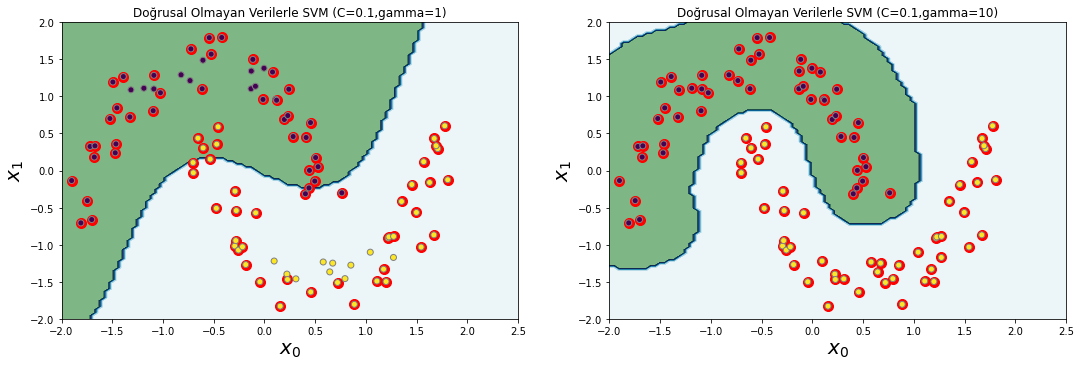

In [15]:
plt.figure(figsize=(18,12))
plt.subplot(2,2,1)
plt.contourf(xx, yy, model.predict(np.array([xx.ravel(), yy.ravel()]).T).reshape(xx.shape), 
             alpha=0.5, levels=10, cmap=plt.cm.ocean)
plt.scatter(*model.support_vectors_.T, s=100, linewidth=1, facecolors='red')
# plt.colorbar().set_label('$w^T X + b$',fontsize=20)
plt.scatter(*(preprocessing.scale(X*[1000, 1])).T, c=y, edgecolors='grey')
plt.title('Doğrusal Olmayan Verilerle SVM (C=0.1,gamma=1)')
plt.xlabel('$x_0$', fontsize=20)
plt.ylabel('$x_1$', fontsize=20)

plt.subplot(2,2,2)
plt.contourf(xx, yy, model3.predict(np.array([xx.ravel(), yy.ravel()]).T).reshape(xx.shape), 
             alpha=0.5, levels=10, cmap=plt.cm.ocean)
plt.scatter(*model3.support_vectors_.T, s=100, linewidth=1, facecolors='red')
# plt.colorbar().set_label('$w^T X + b$',fontsize=20)
plt.scatter(*(preprocessing.scale(X*[1000, 1])).T, c=y, edgecolors='grey')
plt.title('Doğrusal Olmayan Verilerle SVM (C=0.1,gamma=10)')
plt.xlabel('$x_0$', fontsize=20)
plt.ylabel('$x_1$', fontsize=20);


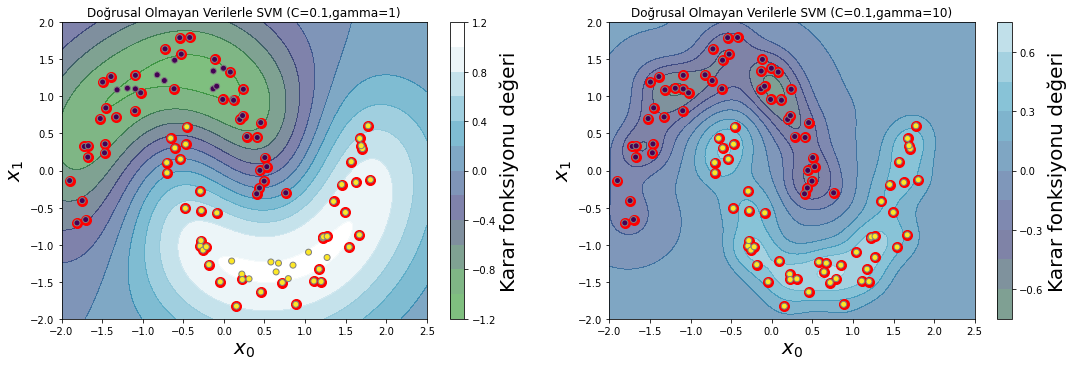

In [16]:
plt.figure(figsize=(18,12))
plt.subplot(2,2,1)
plt.contourf(xx, yy, model.decision_function(np.array([xx.ravel(), yy.ravel()]).T).reshape(xx.shape), 
             alpha=0.5, levels=10, cmap=plt.cm.ocean, vmin=-1, vmax=1)
plt.colorbar().set_label('Karar fonksiyonu değeri',fontsize=20)
plt.scatter(*model.support_vectors_.T, s=100, linewidth=1, facecolors='red')
plt.scatter(*(preprocessing.scale(X*[1000, 1])).T, c=y, edgecolors='grey')
plt.title('Doğrusal Olmayan Verilerle SVM (C=0.1,gamma=1)')
plt.xlabel('$x_0$', fontsize=20)
plt.ylabel('$x_1$', fontsize=20)

plt.subplot(2,2,2)
plt.contourf(xx, yy, model3.decision_function(np.array([xx.ravel(), yy.ravel()]).T).reshape(xx.shape), 
             alpha=0.5, levels=10, cmap=plt.cm.ocean, vmin=-1, vmax=1)
plt.colorbar().set_label('Karar fonksiyonu değeri',fontsize=20)
plt.scatter(*model3.support_vectors_.T, s=100, linewidth=1, facecolors='red')
plt.scatter(*(preprocessing.scale(X*[1000, 1])).T, c=y, edgecolors='grey')
plt.title('Doğrusal Olmayan Verilerle SVM (C=0.1,gamma=10)')
plt.xlabel('$x_0$', fontsize=20)
plt.ylabel('$x_1$', fontsize=20);


In [17]:
X1, y1 = datasets.make_circles(n_samples=100, noise=0.05, factor=0.5, random_state=40)

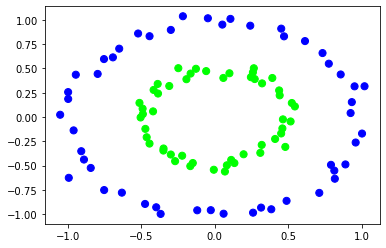

In [18]:
plt.scatter(*X1.T, c=y1, s=50, cmap='brg');

In [19]:
model4 = svm.SVC(kernel = 'rbf', C=10)

In [20]:
model4.fit(preprocessing.scale(X1*[1000, 1]),y1)

SVC(C=10)

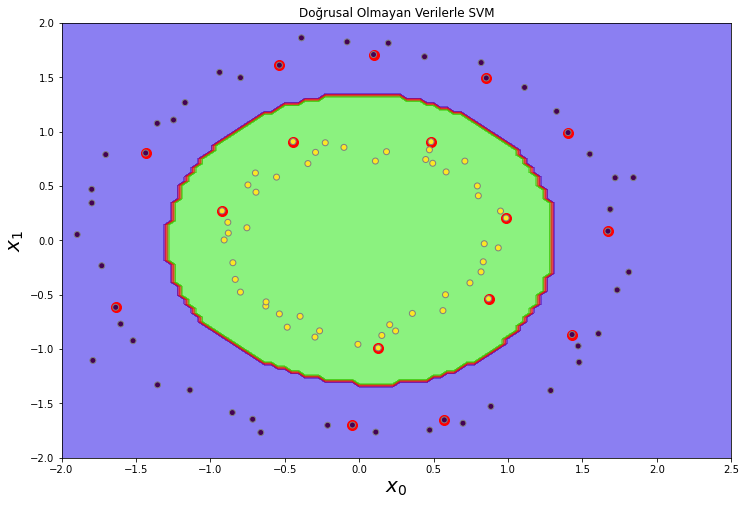

In [21]:
plt.figure(figsize=(12,8))
plt.contourf(xx, yy, model4.predict(np.array([xx.ravel(), yy.ravel()]).T).reshape(xx.shape), 
             alpha=0.5, levels=10, cmap=plt.cm.brg)
plt.scatter(*model4.support_vectors_.T, s=100, linewidth=1, facecolors='red')
# plt.colorbar().set_label('$w^T X + b$',fontsize=20)
plt.scatter(*(preprocessing.scale(X1*[1000, 1])).T, c=y1, edgecolors='grey')
plt.title('Doğrusal Olmayan Verilerle SVM')
plt.xlabel('$x_0$', fontsize=20)
plt.ylabel('$x_1$', fontsize=20);

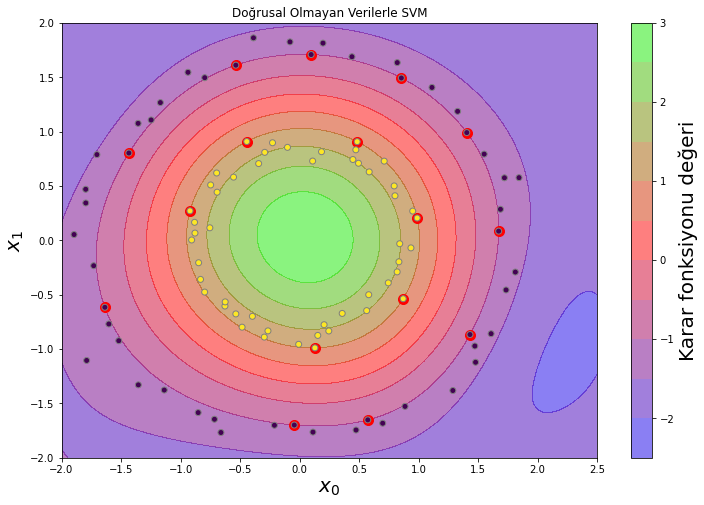

In [22]:
plt.figure(figsize=(12,8))
plt.contourf(xx, yy, model4.decision_function(np.array([xx.ravel(), yy.ravel()]).T).reshape(xx.shape), 
             alpha=0.5, levels=10, cmap=plt.cm.brg)
plt.colorbar().set_label('Karar fonksiyonu değeri',fontsize=20)
plt.scatter(*model4.support_vectors_.T, s=100, linewidth=1, facecolors='red')
plt.scatter(*(preprocessing.scale(X1*[1000, 1])).T, c=y1, edgecolors='grey')
plt.title('Doğrusal Olmayan Verilerle SVM')
plt.xlabel('$x_0$', fontsize=20)
plt.ylabel('$x_1$', fontsize=20);